In [1]:
import numpy as np
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import LeakyReLU

In [3]:
(train_X,train_Y), (test_X,test_Y) = mnist.load_data()
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


In [4]:
classes = np.unique(train_Y)
nClasses =len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


In [5]:
plt.figure(figsize=[5,5])


<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

Text(0.5, 1.0, 'Ground Truth : 5')

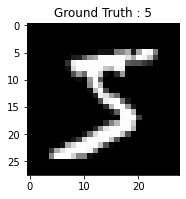

In [6]:
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

Text(0.5, 1.0, 'Ground Truth : 7')

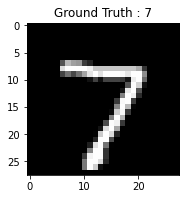

In [16]:
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

In [7]:
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)
train_X.shape, test_X.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [8]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255
test_X = test_X / 255

In [9]:
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

In [10]:
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape


Original label: 5
After conversion to one-hot: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

In [11]:
batch_size = 64
epochs = 3
num_classes = 10
m_model = Sequential()
m_model.add(Conv2D(32, kernel_size=(3, 
3),activation='linear',input_shape=(28,28,1),padding='same'))
m_model.add(LeakyReLU(alpha=0.1))
m_model.add(MaxPooling2D((2, 2),padding='same'))

In [15]:
m_model.add(Flatten())
m_model.add(Dense(128, activation='linear'))
m_model.add(LeakyReLU(alpha=0.1)) 
m_model.add(Dense(num_classes, activation='softmax'))
m_model.compile(loss=keras.losses.categorical_crossentropy, 
optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
m_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               802944    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 128)               0         
                                                        

In [13]:
m_model.add(Flatten())
m_model.add(Dense(128, activation='linear'))
m_model.add(LeakyReLU(alpha=0.1)) 
m_model.add(Dense(num_classes, activation='softmax'))
m_model.compile(loss=keras.losses.categorical_crossentropy, 
optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
m_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               802944    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 128)               0         
                                                        

In [17]:
m_train = m_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/3
750/750 [==============================] - 11s 15ms/step - loss: 0.9275 - accuracy: 0.6445 - val_loss: 0.3210 - val_accuracy: 0.9364
Epoch 2/3
750/750 [==============================] - 11s 15ms/step - loss: 0.1615 - accuracy: 0.9666 - val_loss: 0.1091 - val_accuracy: 0.9763
Epoch 3/3
750/750 [==============================] - 12s 16ms/step - loss: 0.0759 - accuracy: 0.9828 - val_loss: 0.0898 - val_accuracy: 0.9791


In [19]:
test_eval = m_model.evaluate(test_X, test_Y_one_hot, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.08825306594371796
Test accuracy: 0.9797999858856201


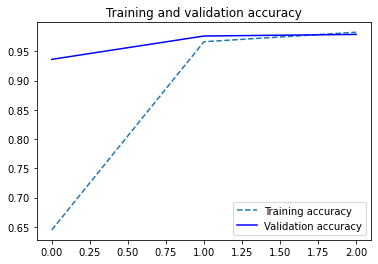

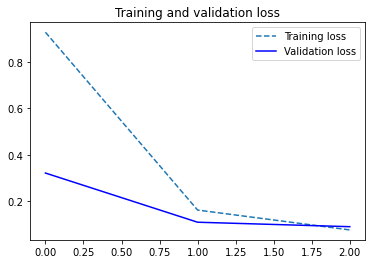

In [20]:
accuracy = m_train.history['accuracy']
val_accuracy = m_train.history['val_accuracy']
loss = m_train.history['loss']
val_loss = m_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, '--', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, '--', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
epochs=1

In [21]:
m_model = Sequential()
m_model.add(Conv2D(32, kernel_size=(3, 
3),activation='linear',padding='same',input_shape=(28,28,1)))
m_model.add(LeakyReLU(alpha=0.1))
m_model.add(MaxPooling2D((2, 2),padding='same'))
m_model.add(Dropout(0.25))

In [22]:
m_model.add(Flatten())
m_model.add(Dense(128, activation='linear'))
m_model.add(LeakyReLU(alpha=0.1)) 
m_model.add(Dropout(0.3))
m_model.add(Dense(num_classes, activation='softmax'))
m_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 flatten_3 (Flatten)         (None, 6272)              0         
                                                                 
 dense_6 (Dense)             (None, 128)               802944    
                                                      

In [24]:
m_model.compile(loss=keras.losses.categorical_crossentropy, 
optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
m_train_dropout = m_model.fit(train_X, train_label, 
batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, 
valid_label))

750/750 [==============================] - 13s 17ms/step - loss: 0.2629 - accuracy: 0.9199 - val_loss: 0.0975 - val_accuracy: 0.9723


In [25]:
m_model.save("fashion_model_dropout.h5py")
test_eval = m_model.evaluate(test_X, test_Y_one_hot, verbose=1)

INFO:tensorflow:Assets written to: fashion_model_dropout.h5py\assets


INFO:tensorflow:Assets written to: fashion_model_dropout.h5py\assets


313/313 [==============================] - 1s 2ms/step - loss: 0.0876 - accuracy: 0.9736


In [26]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.08755829185247421
Test accuracy: 0.9735999703407288


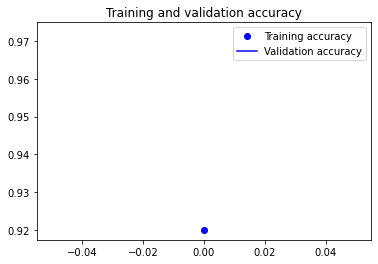

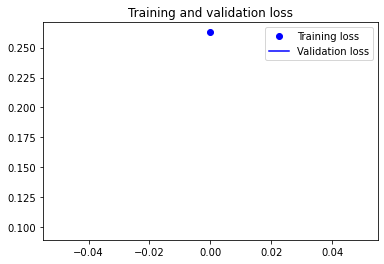

In [27]:
accuracy = m_train_dropout.history['accuracy']
val_accuracy = m_train_dropout.history['val_accuracy']
loss = m_train_dropout.history['loss']
val_loss = m_train_dropout.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [28]:
predicted_classes = m_model.predict(test_X)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
predicted_classes.shape, test_Y.shape

313/313 [==============================] - 1s 2ms/step


((10000,), (10000,))